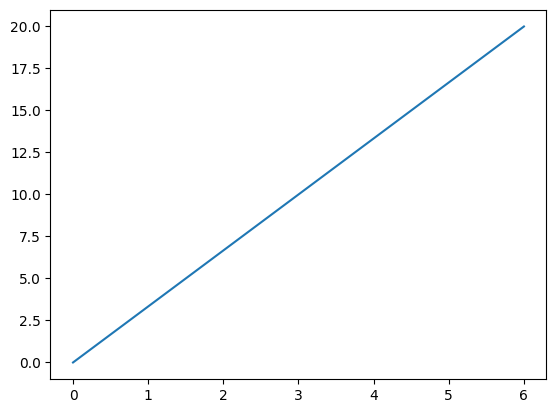

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

xpoints = np.array([0, 6])
ypoints = np.array([0, 20])

plt.plot(xpoints, ypoints)
plt.show()

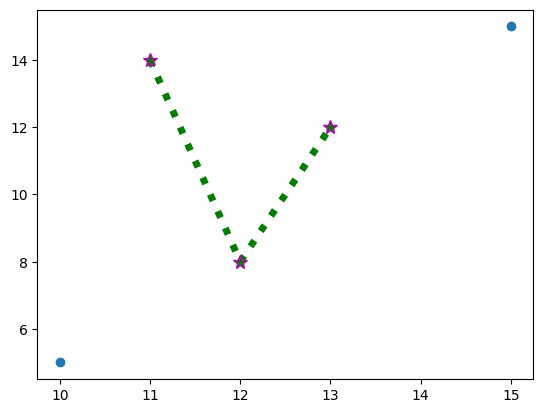

In [21]:
xpoints = np.array([10, 15])
ypoints = np.array([5, 15])

x2points = np.array([11, 12, 13])
y2points = np.array([14, 8, 12])

plt.plot(xpoints, ypoints, "o")
plt.plot(x2points, y2points, "*:g", ms=10, mec="m", lw=5)
plt.show()

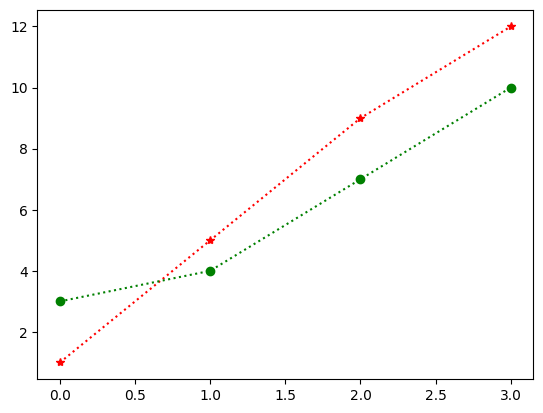

In [26]:
y1 = np.array([1, 5, 9, 12])
y2 = np.array([3, 4, 7, 10])

plt.plot(y1, "*:r")
plt.plot(y2, "o:g")
plt.show()

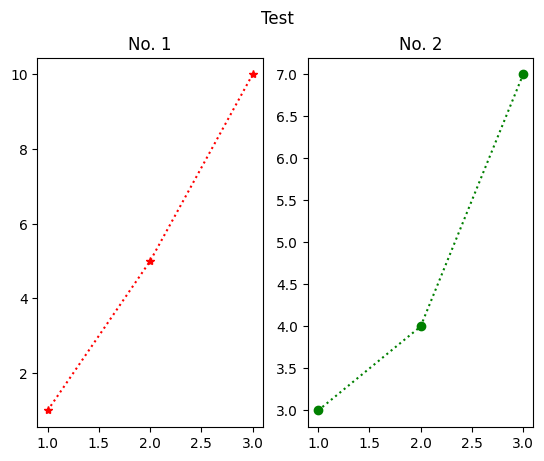

In [49]:
# plot 1:
x1 = np.array([1, 2, 3])
y1 = np.array([1, 5, 10])

plt.subplot(1, 2, 1)
plt.plot(x1, y1, "*:r")
plt.title("No. 1")

x2 = np.array([1, 2, 3])
y2 = np.array([3, 4, 7])

plt.subplot(1, 2, 2)
plt.plot(x2, y2, "o:g")
plt.title("No. 2")

plt.suptitle("Test")
plt.show()

In [ ]:
x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

font1 = {"family": "serif", "color": "hotpink", "size": 20}
font2 = {"family": "serif", "color": "lightpink", "size": 15}

plt.title("Sportswatch Data", fontdict=font1, loc="left")
plt.xlabel("Average Pulse", fontdict=font2)
plt.ylabel("Calorie Burnage", fontdict=font2)

plt.plot(x, y, "*")
plt.grid(ls="--")

plt.show()

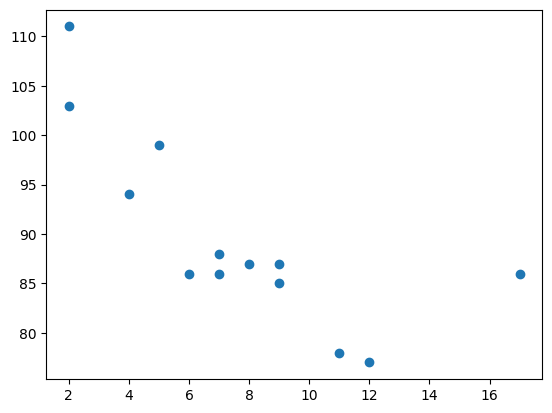

In [50]:
x = np.array([5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6])
y = np.array([99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86])

plt.scatter(x, y)
plt.show()

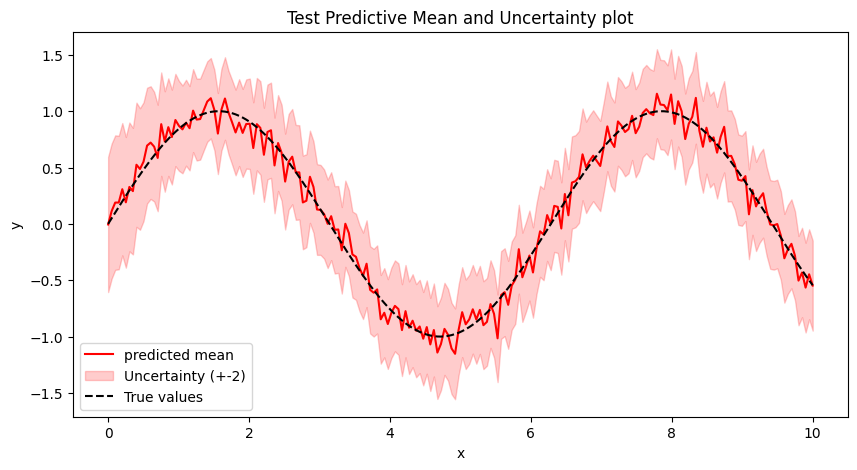

In [5]:
# Fully artificial example
# Array with evenly spaced values
x = np.linspace(0, 10, 200)

# our actual function with correct values
true_y = np.sin(x)

# creates artificial noise
pred_mean = np.sin(x) + 0.1 * np.random.randn(len(x))

pred_std = 0.2 + 0.1 * np.sinc(x)

plt.figure(figsize=(10, 5))
plt.plot(x, pred_mean, label="predicted mean", color="red")
plt.fill_between(
    x,
    pred_mean - 2 * pred_std,
    pred_mean + 2 * pred_std,
    alpha=0.2,
    color="red",
    label="Uncertainty (+-2)",
)
plt.plot(x, true_y, color="black", linestyle="--", label="True values")

plt.title("Test Predictive Mean and Uncertainty plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

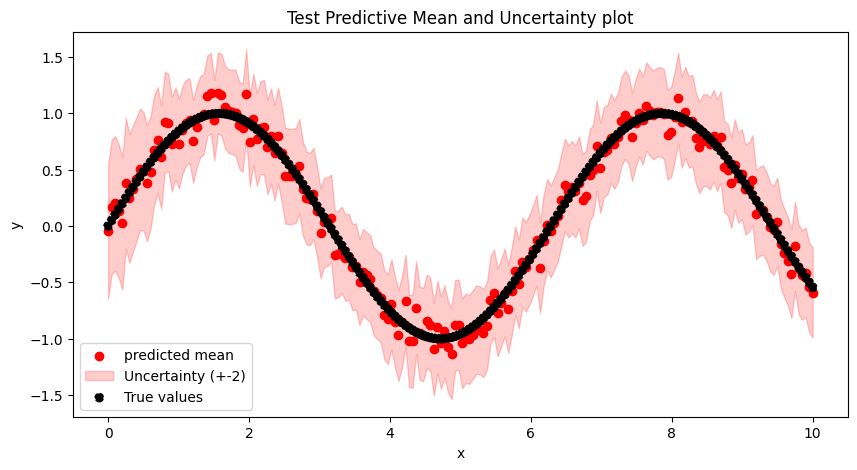

In [14]:
# Fully artificial example for scatterplot
# Array with evenly spaced values
x = np.linspace(0, 10, 200)

# our actual function with correct values
true_y = np.sin(x)

# creates artificial noise
pred_mean = np.sin(x) + 0.1 * np.random.randn(len(x))

pred_std = 0.2 + 0.1 * np.sinc(x)

plt.figure(figsize=(10, 5))
plt.scatter(x, pred_mean, label="predicted mean", color="red")
plt.fill_between(
    x,
    pred_mean - 2 * pred_std,
    pred_mean + 2 * pred_std,
    alpha=0.2,
    color="red",
    label="Uncertainty (+-2)",
)
plt.scatter(x, true_y, color="black", linestyle="--", label="True values")

plt.title("Test Predictive Mean and Uncertainty plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

(50, 10, 2)


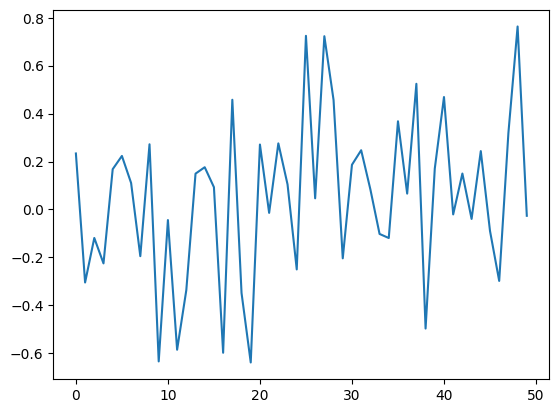

In [5]:
# Due to some import issues this is copied from quantification/regression
# origin of issue is known and will be fixed for future instance
def total_variance(probs: npt.NDArray[np.floating]) -> npt.NDArray[np.floating]:
    """Compute total variance as the total uncertainty using variance-based measures.

    Assumes that the input is from a distribution over parameters of
    a normal distribution. The first element of the parameter vector is the mean
    and the second element is the variance.
    The total uncertainty is the variance of the mixture of normal distributions.

    Args:
        probs: numpy.ndarray, shape (n_instances, n_samples, (mu, sigma^2))

    Returns:
        tv: numpy.ndarray, shape (n_instances,)

    """
    tv = np.mean(probs[:, :, 1], axis=1) + np.var(probs[:, :, 0], axis=1)
    return tv


n_instances = 50
n_samples = 10

mu = np.random.rand(n_instances, n_samples)
sigma2 = np.random.randn(n_instances, n_samples)

probs = np.stack([mu, sigma2], axis=-1)
print(probs.shape)
tv = total_variance(probs)
plt.plot(tv)